Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора , можно использовать визуализацию с помощью библиотеки matplotlib,

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import itertools
import functools

In [ ]:
def visualize_polygons(polygons):
    fig, ax = plt.subplots()
    ax.set_ylim()
    ax.set_xlim()

    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    plt.xticks([i for i in range(-7,8)])   #список расположения xtick
    plt.yticks([i for i in range(-7,8)])   #список расположения ytick
    for polygon in polygons:
        # разбивание координат вершин на отдельные списки x и y
        x, y = zip(*polygon)   # * для распаковки кортежа
        # добавление первой вершины в конец списка, чтобы замкнуть полигон
        x += (x[0],) # зaпятая чтобы соединить кортежи, иначе ощибка с int
        y += (y[0],)
        # отображение полигона на графике
        ax.plot(x, y)
    plt.show()

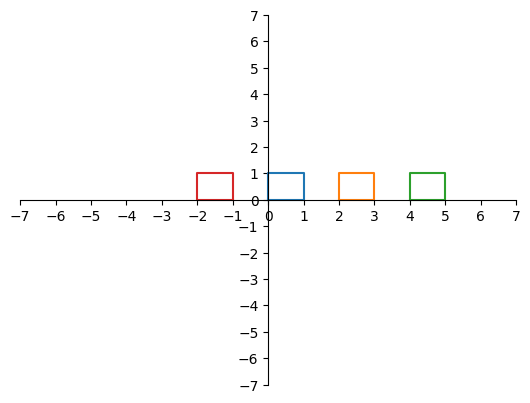

In [ ]:
polygons = [
    [(0, 0), (1, 0), (1, 1), (0, 1)],
    [(2, 0),(3,0),(3,1),(2,1)],
    [(4, 0), (5, 0), (5, 1), (4, 1)],
    [(-1,0), (-2,0), (-2,1), (-1,1)],

]
visualize_polygons(polygons)
#visualize_polygons(hex_coords([(-6,0),(-5,0),(-4,1),(-5,2),(-6,2),(-7,1)],5))
#visualize_polygons(hex_coords([(1,0),(3,0),(4,2),(3,3),(1,3),(0,2)],3))

In [ ]:
f = [(-7, 0), (-6, 0), (-6, 1), (-7, 1)]
t =  [(1,1), (2,1), (1.5,2)]

▶:

---



---

*      2. Реализовать функции, генерирующие бесконечную последовательность не пересекающихся полигонов с различающимися координатами (например, «ленту»):
        1. прямоугольников ( gen_rectangle() );
        2. треугольников ( gen_triangle() );
        3. правильных шестиугольников ( gen_hexagon() ).
        4. с помощью данных функций используя функции из модуля itertools сгенерировать 7 фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.




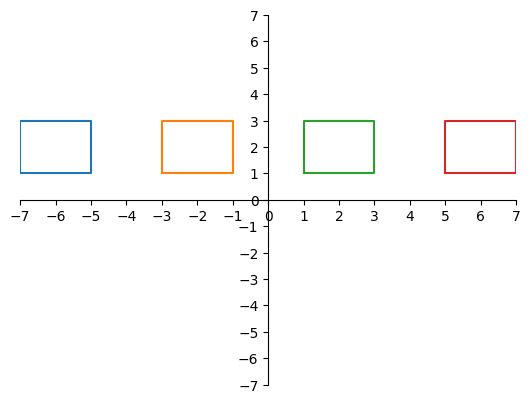

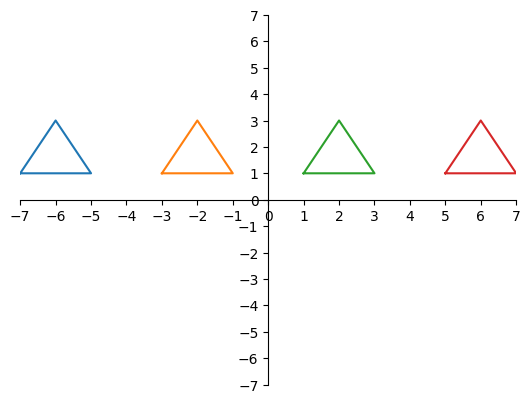

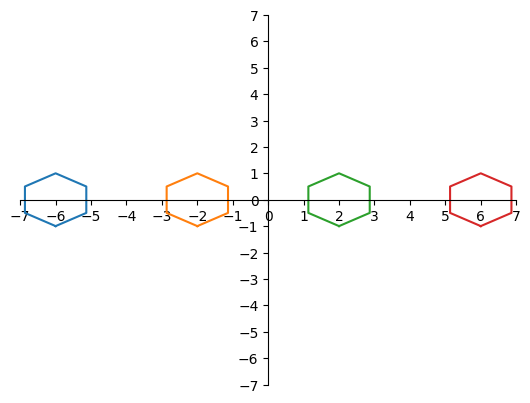

In [ ]:
import random
import matplotlib.pyplot as plt
import itertools
import math

def gen_rectangle():
    t = -7
    while True:
        x1 = t
        y1 = 1
        x2 = t+2
        y2 = 3
        polygon = ((x1, y1), (x2, y1),(x2, y2), (x1, y2))
        yield polygon
        t += 4
def gen_triangle():
    # Генерация случайных координат вершин прямоугольника
    t = -7
    while True:
      x1=t
      y1 = 1
      x2=x1+2
      y2= 1
      x3=x1+1
      y3=3
      yield [(x1, y1), (x2, y2), (x3, y3)]
      t+=4

def gen_hexagon():
    # Генерация случайных координат вершин шестиугольника
    t = -7
    while True:
        x_center = t + 1    # -6
        y_center = 0        #2
        radius = 1
        # calculate the coordinates of six vertices
        x1 = x_center  # -6
        y1 = y_center - radius # 1
        x2 = x_center + radius * math.cos(math.pi/6)  # -6+1*cos
        y2 = y_center - radius * math.sin(math.pi/6)  # 2 - 1*sin
        x3 = x2
        y3 = y_center + radius * math.sin(math.pi/6)  # 2 + 1*sin
        x4 = x_center
        y4 = y_center + radius
        x5 = x_center - radius * math.cos(math.pi/6)
        y5 = y3
        x6 = x5
        y6 = y_center - radius * math.sin(math.pi/6)
        yield [(x1, y1), (x2, y2), (x3, y3), (x4, y4), (x5, y5), (x6, y6)]
        t += 4

def sumup_polygons(gen, numb):
    return itertools.islice(itertools.chain.from_iterable(zip(gen)),numb)
    #islice(elements from seq[start:stop:step]),chain('a b c d'-> ab bc cd)
    #from_iterable(chain.from_iterable(['ABC', 'DEF']) --> A B C D E F)
rec = sumup_polygons(gen_rectangle(),7)
visualize_polygons(rec)
tr = sumup_polygons(gen_triangle(),7)
visualize_polygons(tr)
hex = sumup_polygons(gen_hexagon(),7)
visualize_polygons(hex)

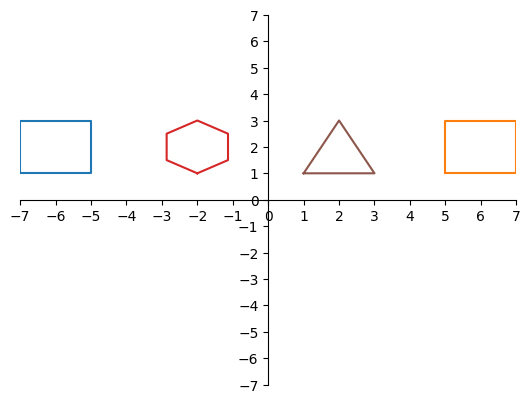

In [ ]:
pol_l = list(itertools.permutations([gen_rectangle,gen_triangle,gen_hexagon]))   #перестановки элементов длиной r
rand_pol = random.choice(pol_l)
l1 = list(itertools.islice(itertools.chain(rand_pol[0]()), 0,7,3))
l2 = list(itertools.islice(itertools.chain(rand_pol[1]()), 1,7,3))
l3 = list(itertools.islice(itertools.chain(rand_pol[2]()), 2,7,3))
pol_l = tuple(l1+l2+l3)
visualize_polygons(pol_l)

_______________________________________________________________________________


Реализовать операции:
*  параллельный перенос ( tr_translate );
*   поворот ( tr_rotate );
*   симметрия ( tr_symmetry );
*  гомотетия ( tr_homothety );

которые можно применить к последовательности полигонов с помощью функции map.



In [ ]:
def tr_rotate(polygon, angle=45):
    a_in_rad = math.radians(angle)
    rot_pols = [(x*math.cos(a_in_rad) - y*math.sin(a_in_rad), x*math.sin(a_in_rad) + y*math.cos(a_in_rad)) for x, y in polygon]
    return rot_pols

def tr_symmetry(polygon, axis='y'):
    if axis == 'y':
        sym_pol = [(x,-y) for x,y in polygon]
    else:
        sym_pol = [(-x,y) for x,y in polygon]
    return sym_pol

def tr_homothety(polygon, k=-1.5, center=(3,3)):    #как подобие фигур, к- коэф подобия,
    (x0, y0) = center
    hom_pol = [((x-x0)*k + x0, (y-y0)*k + y0) for x, y in polygon]
    return hom_pol

def tr_translate(polygon, a=2):
    return tuple((x ,y+a) for x, y in polygon)

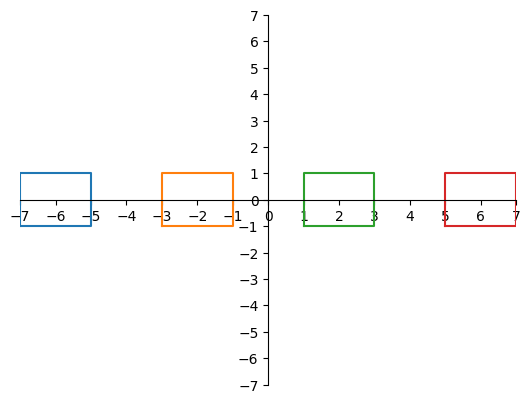

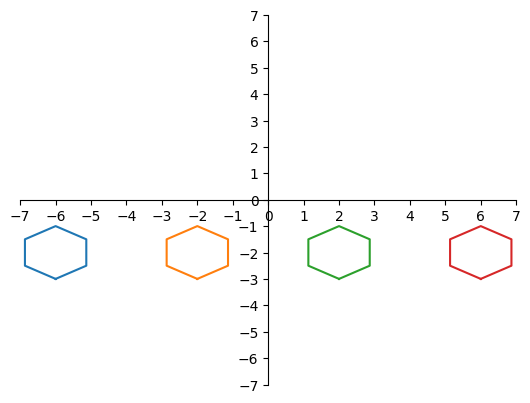

In [ ]:
result = sumup_polygons(map(lambda polygon: tr_translate(polygon, -2), gen_rectangle()),5)
visualize_polygons(result)
result1 = sumup_polygons(map(lambda polygon: tr_translate(polygon, -4), gen_hexagon()),5)
visualize_polygons(result1)

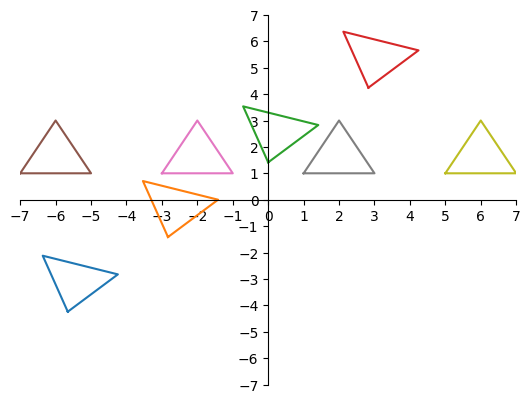

In [ ]:
m1 = map(tr_rotate, sumup_polygons(gen_triangle(),5))
n1 = list(m1)+list(sumup_polygons(gen_triangle(), 5))
visualize_polygons(n1)

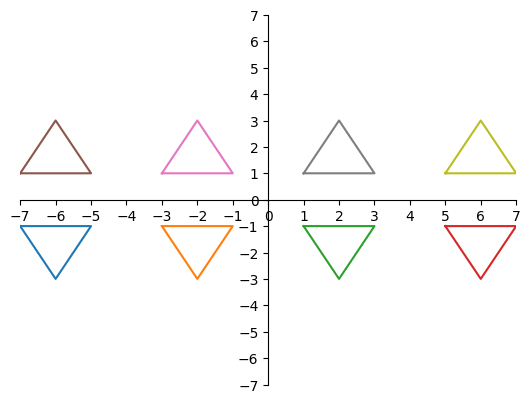

In [ ]:
m2 = map(tr_symmetry,sumup_polygons(gen_triangle(),5))
n2 = list(m2)+list(sumup_polygons(gen_triangle(), 5))
visualize_polygons(n2)

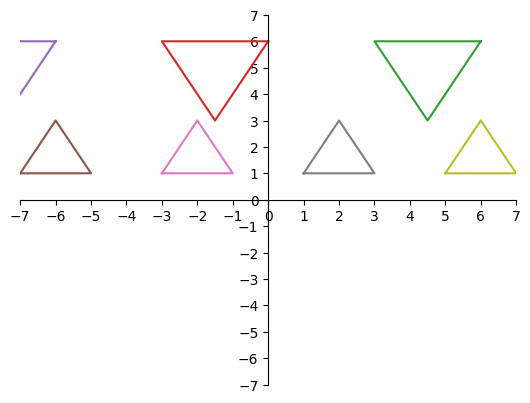

In [ ]:
m2 = map(tr_homothety, sumup_polygons(gen_triangle(),5))
n2 = list(m2)+list(sumup_polygons(gen_triangle(), 5))
visualize_polygons(n2)

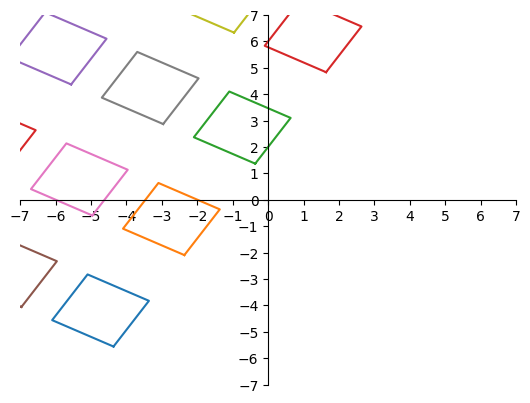

In [ ]:
start = list(itertools.islice(itertools.chain(gen_rectangle()),5))
k1 = list(map(lambda p: tr_translate(p, 3), sumup_polygons(gen_rectangle(),7)))
k2 = list(map(lambda p: tr_translate(p, 6), sumup_polygons(gen_rectangle(),7)))
k3 = start+k1+k2
k3 = list(map(lambda p: tr_rotate(p, 60), k3))
visualize_polygons(k3)

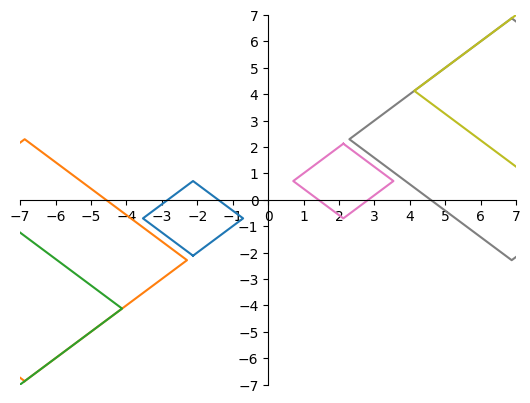

In [ ]:
st = list(map(lambda p: tr_translate(p, -1), sumup_polygons(gen_rectangle(),2)))
_4 = list(map(lambda p: tr_rotate(p, 45), sumup_polygons(st[1:],2)))

v = 1.8
h_pol = list(map(lambda p: tr_homothety(p,v, (0,0)), sumup_polygons(_4,1)))

pols = []
for i in range(5):
    pols += (list(map(lambda p: tr_homothety(p,v, (0,0)), sumup_polygons(h_pol,1))))
    h_pol = list(map(lambda p: tr_homothety(p,v, (0,0)), itertools.islice(itertools.chain(h_pol),1)))

sym = list(map(lambda p: tr_symmetry(p, 'y'), sumup_polygons((_4+pols),len(pols)+1)))
sym = list(map(lambda p: tr_symmetry(p, 'x'), sumup_polygons(itertools.chain(sym),len(pols)+1)))

result = _4+pols+sym

visualize_polygons(result)

In [ ]:
def tr_translate(polygon, x, y):
    translated_polygon = []
    for point in polygon:
        translated_x = point[0] + x
        translated_y = point[1] + y
        translated_polygon.append((translated_x, translated_y))
    return translated_polygon


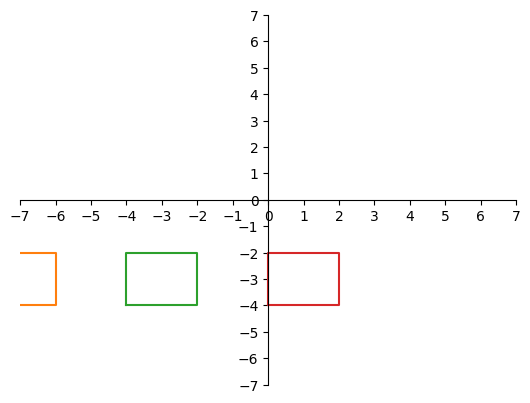

In [ ]:
rectangles = gen_rectangle()
translated_rectangles = []
for i in range(4):
    polygon = next(rectangles)
    translated_polygon = tr_translate(polygon, -5, -5)
    translated_rectangles.append(translated_polygon)
visualize_polygons(translated_rectangles)
#rec = sumup_polygons(gen_rectangle(),7)
#visualize_polygons(rec)


матрица поворота

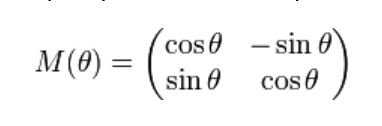

In [ ]:
import math

def tr_rotate(gen, angle):
    radians = math.radians(angle)
    for polygon in gen:
        new_polygon = []
        for x, y in polygon:
          #матрица поворота
            new_x = x * math.cos(radians) - y * math.sin(radians)
            new_y = x * math.sin(radians) + y * math.cos(radians)
            new_polygon.append((new_x, new_y))
        yield new_polygon


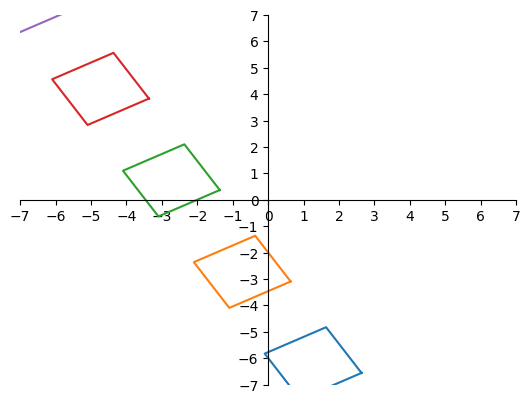

In [ ]:
rectangles = gen_rectangle()
rotated_rectangles = tr_rotate(rectangles, 120)
result = sumup_polygons(rotated_rectangles, 5)
visualize_polygons(list(result))


In [ ]:
def tr_rotate(polygon, angle=45):
    a_in_rad = math.radians(angle)
    rot_pols = [(x*math.cos(a_in_rad) - y*math.sin(a_in_rad), x*math.sin(a_in_rad) + y*math.cos(a_in_rad)) for x, y in polygon]
    return rot_pols

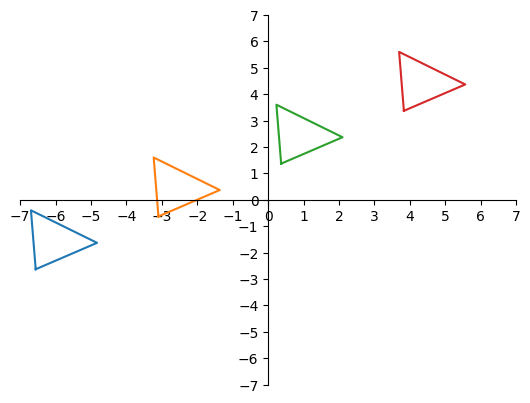

In [ ]:
trs = gen_triangle()
rotated_rectangles = tr_rotate(trs, 30)
result = sumup_polygons(rotated_rectangles, 5)
visualize_polygons(list(result))

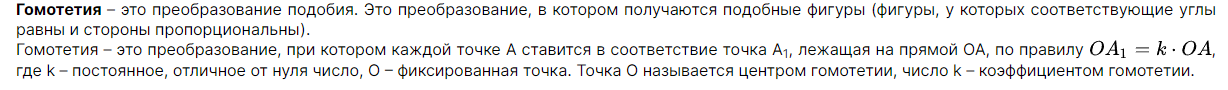

  6. Реализовать операции:
        1. фильтрации фигур, являющихся выпуклыми многоугольниками ( flt_convex_polygon );
        2. фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой ( flt_angle_point );
        3. фильтрации фигур, имеющих площадь менее заданной ( flt_square );
        4. фильтрации фигур, имеющих кратчайшую сторону менее заданного значения ( flt_short_side );
        5. фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) ( flt_point_inside );
        6. фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника ( flt_polygon_angles_inside );
которые можно применить к последовательности полигонов с помощью функции filter

In [ ]:
pol_lst = (((0,0),(1,0),(1,1),(0,1)), ((2,0),(5,3),(7,2)),((0,0),(0,2),(3,4),(5,2),(6,2),(6,0)))

In [ ]:
def flt_convex_polygon(coords):
    n = len(coords)
    if n < 3:
        return False
    d = sgn((coords[1][0]-coords[0][0])*(coords[2][1]-coords[1][1]) -
            (coords[2][0]-coords[1][0])*(coords[1][1]-coords[0][1]))
    for i in range(3, n+1):
        if sgn((coords[i-2][0]-coords[i-3][0])*(coords[i-1][1]-coords[i-2][1]) -
               (coords[i-1][0]-coords[i-2][0])*(coords[i-2][1]-coords[i-3][1])) != d:
            return False
    return True

def sgn(x):
    if x > 0:
        return 1
    if x < 0:
        return -1
    return 0



def flt_angle_point(polygons,a=1,b=0):   # фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой
    filted_pols = []
    for p in polygons:
        if (a,b) in p:
            filted_pols.append(p)
    return filted_pols

def flt_square(polygons, sq=2):
    filted_pols = []
    for p in polygons:
        xx = []
        yy = []
        for x,y in p:
            xx.append(x)
            yy.append(y)
        xx = np.array(xx)
        yy = np.array(yy)
        sum2 = (xx[1:]*yy[0:-1]).sum()+(xx[0]*yy[-1])   #вычисления площади полигона
        sum1 = (yy[1:]*xx[0:-1]).sum()+(yy[0]*xx[-1])
        summa = abs(sum1 - sum2)/2
        if summa <= sq:
            filted_pols.append(p)
    return filted_pols

def flt_short_side(polygons, side=1.1):    # фильтрации фигур, имеющих кратчайшую сторону менее заданного значения
    def short_side(polygon, side):
        def find_length(p1, p2):
            x1,y1 = p1
            x2,y2 = p2
            return math.dist(p1,p2)

        shortest = float('inf')
        m = len(polygon)
        for i in range(m):
            p1 = polygon[i]
            p2 = polygon[(i + 1) % m]
            length = find_length(p1, p2)
            shortest = min(shortest, length)

        return shortest < side

    return filter(lambda p: short_side(p, side), polygons)

def flt_point_inside(polygons, point=(0.5,0.5)):   # фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника)
    polygons = flt_convex_polygon(polygons)
    def is_point_inside(polygon, point):
        x, y = point
        c = 0
        m = len(polygon)

        for i in range(m):
            p1 = polygon[i]
            p2 = polygon[(i + 1) % m]
            if ((p1[1] > y) != (p2[1] > y)) and (x < (p2[0]-p1[0]) * (y-p1[1]) / (p2[1]-p1[1]) + p1[0]):
                c += 1

        return c % 2 == 1

    return filter((lambda p: is_point_inside(p,point)), polygons)

def flt_polygon_angles_inside(polygons, pol=((0,0),(1,0),(1,1))):    # фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника
    polygons = flt_convex_polygon(polygons)
    def is_point_inside(polygon, point):
        x, y = point
        c = 0
        m = len(polygon)

        for i in range(m):
            p1 = polygon[i]
            p2 = polygon[(i + 1) % m]
            if ((p1[1] > y) != (p2[1] > y)) and (x < (p2[0]-p1[0]) * (y-p1[1]) / (p2[1]-p1[1]) + p1[0]):
                c += 1

        return c % 2 == 1

    def is_angle_inside(polygon, pol):
        for angle in pol:
            if is_point_inside(polygon, angle):
                return True
        return False

    return filter((lambda p: is_angle_inside(p, pol)), polygons)

[((0, 0), (1, 0), (1, 1), (0, 1))]


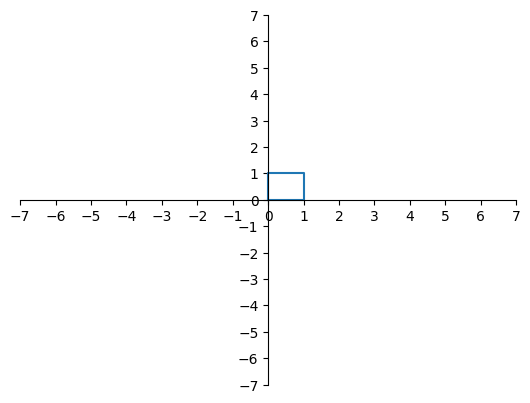

In [ ]:
print(flt_angle_point(pol_lst, 0,1))
visualize_polygons(flt_angle_point(pol_lst, 0,1))

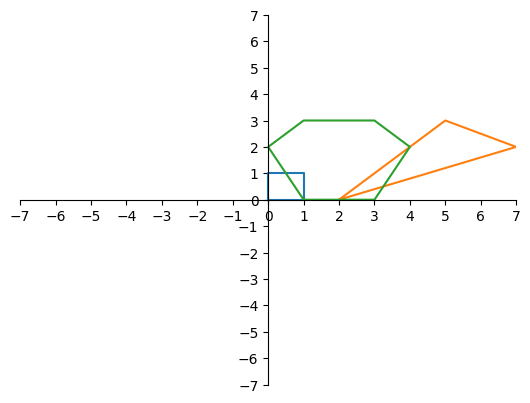

In [ ]:
f = flt_square(pol_lst, 16)
visualize_polygons(f)

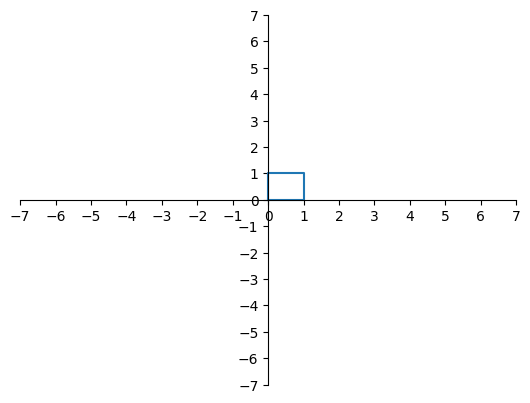

In [ ]:
visualize_polygons(tuple(flt_short_side(pol_lst)))

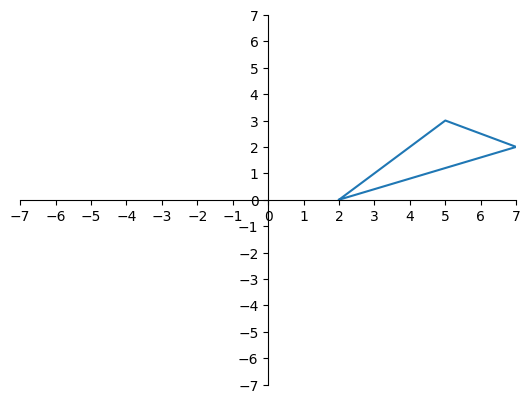

In [ ]:
visualize_polygons(tuple(flt_point_inside(pol_lst,(4,2))))

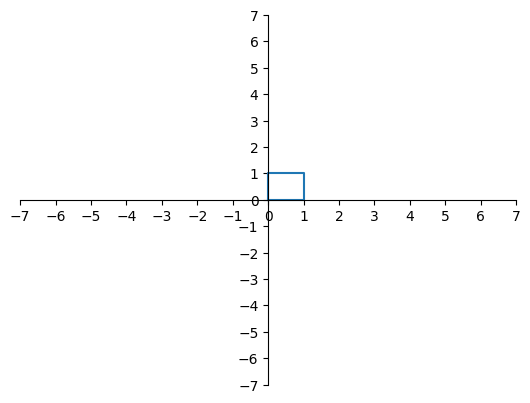

In [ ]:
pol_lst_new = (((0,0),(1,0),(1,1),(0,1)), ((2,0),(5,3),(7,2)),((0,0),(0,2),(3,4),(5,2),(6,2),(6,0)),((0,0),(0,2),(2,2),(3,0)))
visualize_polygons(flt_polygon_angles_inside(coords))

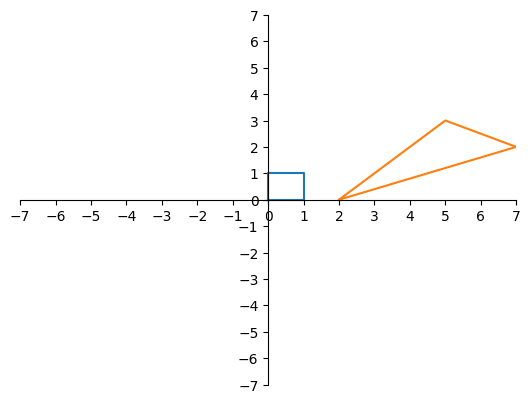

In [ ]:
coords = [((0,0),(1,0),(1,1),(0,1)), ((2,0),(5,3),(7,2)),((0,0),(0,2),(3,4),(5,2),(6,2),(6,0))]
convex_polygons = list(filter(flt_convex_polygon, coords))
visualize_polygons(convex_polygons)

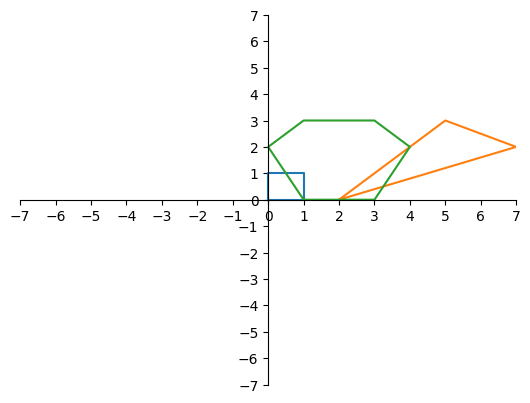

In [ ]:
pol_lst = (((0,0),(1,0),(1,1),(0,1)), ((2,0),(5,3),(7,2)),((1,0),(3,0),(4,2),(3,3),(1,3),(0,2)))
visualize_polygons(list(pol_lst))

In [ ]:
def agr_origin_nearest(before, polygon):
    nearest = min(polygon, key=lambda point: math.dist((0, 0), point))
    return min(before, nearest)


def agr_max_side(before, polygon):
    max_side = max(math.dist(polygon[i], polygon[(i + 1)  % len(polygon)]) for i in range(len(polygon)))  #функция закрывает многоугольник, переходя к первой точке после достижения последней точки.
    return max(before, max_side)


def agr_min_area(before, polygon):
    min_area = abs(0.5 * sum(polygon[i][0] * (polygon[(i+1) % len(polygon)][1] - polygon[(i-1) % len(polygon)][1]) for i in range(len(polygon))))
    return min(before, min_area)


def agr_perimeter(before, polygon):
    per = sum(math.dist(polygon[i], polygon[(i + 1) % len(polygon)]) for i in range(len(polygon)))
    return before + per


def agr_area(before, polygon):
    area = abs(0.5 * sum(polygon[i][0] * (polygon[(i + 1) % len(polygon)][1] - polygon[(i - 1) % len(polygon)][1])for i in range(len(polygon))))
    return before + area

In [ ]:
pol_lst = (((0,0),(1,0),(1,1),(0,1)), ((2,0),(5,3),(7,2)),((0,0),(0,2),(3,4),(5,2),(6,2),(6,0)))

nearest_angle = functools.reduce(agr_origin_nearest, pol_lst, pol_lst[0][0])
max_side = functools.reduce(agr_max_side, pol_lst, 0)
min_area = functools.reduce(agr_min_area, pol_lst,0)
sum_per = functools.reduce(agr_perimeter, pol_lst, 0)
sum_area = functools.reduce(agr_area, pol_lst, 0)

print("Ближайший угол", nearest_angle)
print("Максимальная сторона", max_side)
print("Минимальная площадь", min_area)
print("Суммарный периметр", sum_per)
print("Суммарная площадь", sum_area)

Ближайший угол (0, 0)
Максимальная сторона 6.0
Минимальная площадь 0
Суммарный периметр 33.29785187196376
Суммарная площадь 22.5


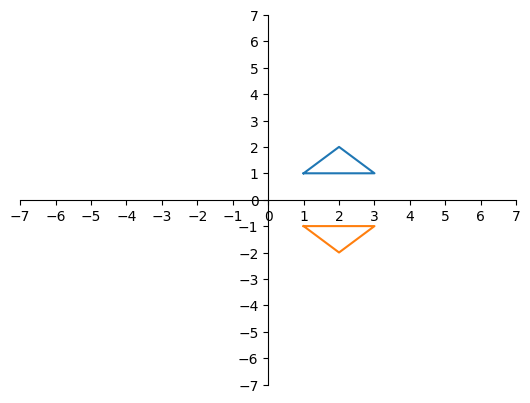

In [ ]:
visualize_polygons([((1,1), (2,2), (3,1)), ((1,-1), (2,-2), (3,-1))])

In [ ]:
def merge_polygons(*poly_seq):
    merged = []
    for polys in zip(*poly_seq):
        concat = []
        for i, poly in enumerate(polys):
            if len(poly) > 2 and i == 1:
                poly = poly[::-1]
            concat += poly
        merged.append(concat)
    return merged

[(5, 1), (6, 2), (7, 1), (7, -1), (6, -2), (5, -1)]


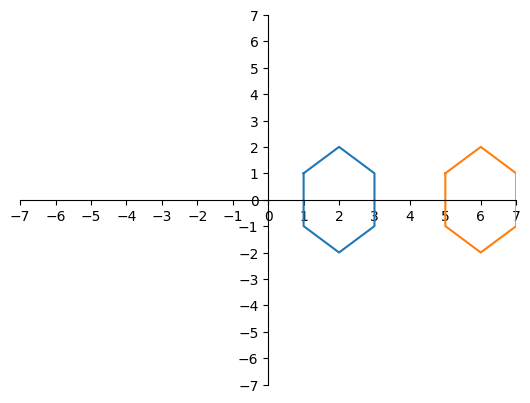

In [ ]:
polygons1 = [((1, 1), (2, 2), (3, 1)), ((5, 1), (6, 2), (7, 1))]
polygons2 = [((1, -1), (2, -2), (3, -1)), ((5, -1), (6, -2), (7, -1))]
result2 = merge_polygons(polygons1, polygons2)
print(result2[1])
visualize_polygons(result2)

In [ ]:
def hex_coords(coords,n=1):
    result = [coords]
    l = coords[2][0]-coords[5][0]
    for i in range(1, n+1):
        coords =list(map(lambda x: (x[0]+l, x[1]), coords))
        result.append(coords)
    return result

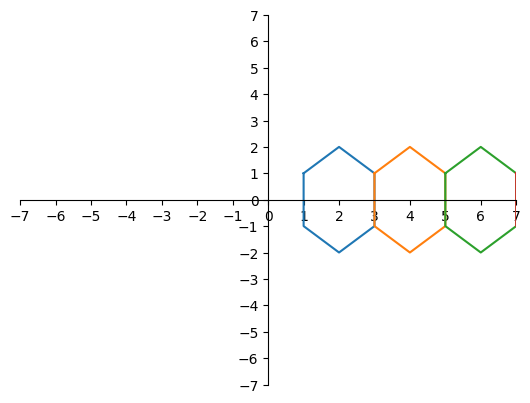

In [ ]:
visualize_polygons(hex_coords(result[0],3))

In [ ]:
def zip_polygons(*iterators):
    result = []
    for polygon in zip(*iterators):
        merged_polygon = []
        for points in polygon:
            merged_polygon.extend(points)
        result.append(tuple(merged_polygon))
    return result

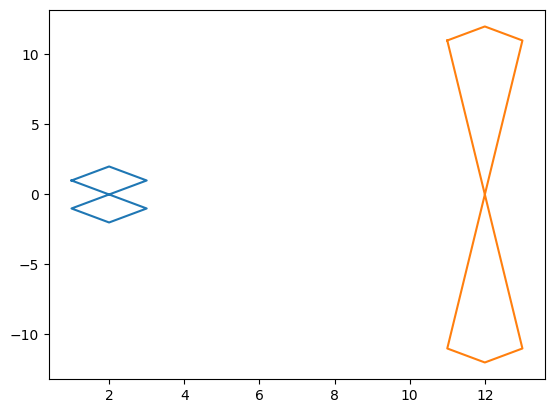

In [ ]:
fig, ax = plt.subplots()
for polygon in result:
        # разбивание координат вершин на отдельные списки x и y
        x, y = zip(*polygon)   # * для распаковки кортежа
        # добавление первой вершины в конец списка, чтобы замкнуть полигон
        x += (x[0],) # зaпятая чтобы соединить кортежи, иначе ощибка с int
        y += (y[0],)
        ax.plot(x, y)
plt.show()